In [1]:
import pandas as pd
import numpy as np

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
train = pd.read_csv('updated_train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,h_distance,day,month,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498521,1.497580,14,3,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805507,1.804374,12,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385098,6.381090,19,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485498,1.484566,6,4,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188588,1.187842,26,3,13,30


In [31]:
test = pd.read_csv('updated_test.csv')
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,h_distance,day,month,hour,minute
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746426,2.744701,30,6,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759239,2.757507,30,6,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306155,1.305335,30,6,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269088,5.265780,30,6,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960842,0.960239,30,6,23,59


In [32]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
trip_duration           int64
distance              float64
h_distance            float64
day                     int64
month                   int64
hour                    int64
minute                  int64
dtype: object

In [33]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,h_distance,day,month,hour,minute
count,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06
mean,1.534291e+00,1.663941e+00,-7.397349e+01,4.075093e+01,-7.397342e+01,4.075180e+01,5.523364e-03,8.368576e+02,3.439475e+00,3.437315e+00,1.550391e+01,3.516760e+00,1.360654e+01,2.959132e+01
std,4.988229e-01,1.313611e+00,7.091177e-02,3.286533e-02,7.067435e-02,3.588810e-02,7.411383e-02,6.589297e+02,4.291486e+00,4.288792e+00,8.702946e+00,1.681031e+00,6.399380e+00,1.732493e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,0.000000e+00,3.970000e+02,1.231724e+00,1.230951e+00,8.000000e+00,2.000000e+00,9.000000e+00,1.500000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,0.000000e+00,6.620000e+02,2.093288e+00,2.091973e+00,1.500000e+01,4.000000e+00,1.400000e+01,3.000000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,0.000000e+00,1.073000e+03,3.874432e+00,3.871999e+00,2.300000e+01,5.000000e+00,1.900000e+01,4.500000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,1.141100e+04,1.240909e+03,1.240130e+03,3.100000e+01,6.000000e+00,2.300000e+01,5.900000e+01


In [34]:
train['passenger_count'].value_counts()

1    1032274
2     210008
5      77869
3      59777
6      48200
4      28348
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [42]:
test['passenger_count'].value_counts()

1    443447
2     90027
5     33411
3     25686
6     20521
4     12017
0        23
9         2
Name: passenger_count, dtype: int64

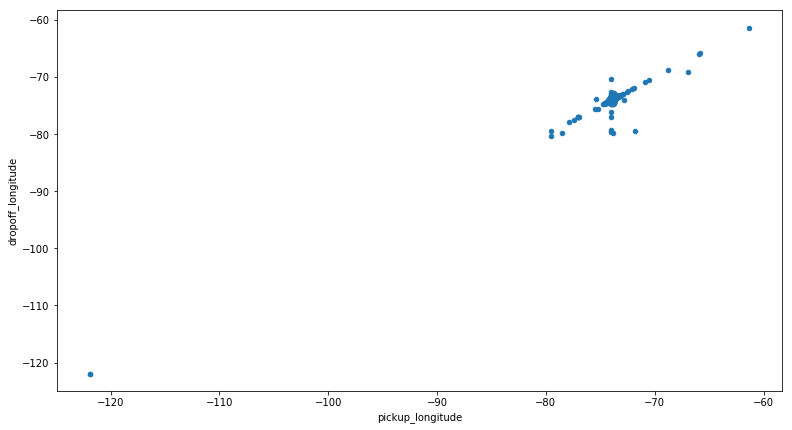

In [13]:
train.plot.scatter(x='pickup_longitude',y='dropoff_longitude',figsize=[13,7])

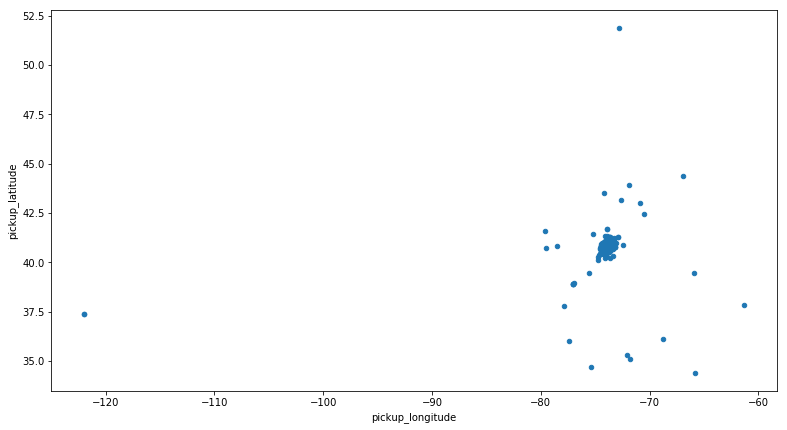

In [14]:
train.plot.scatter(x='pickup_longitude',y='pickup_latitude',figsize=[13,7])

In [45]:
train = train[(train['passenger_count']>=0) & (train['passenger_count']<=6)]

In [15]:
mean = train['pickup_latitude'].mean()
std = train['pickup_latitude'].std()
train = train[(train['pickup_latitude']>(mean-(2*std))) & (train['pickup_latitude']<(mean+(2*std)))]

In [16]:
mean = train['pickup_longitude'].mean()
std = train['pickup_longitude'].std()
train = train[(train['pickup_longitude']>(mean-(2*std))) & (train['pickup_longitude']<(mean+(2*std)))]

In [17]:
mean = train['dropoff_latitude'].mean()
std = train['dropoff_latitude'].std()
train = train[(train['dropoff_latitude']>(mean-(2*std))) & (train['dropoff_latitude']<(mean+(2*std)))]

In [18]:
mean = train['dropoff_longitude'].mean()
std = train['dropoff_longitude'].std()
train = train[(train['dropoff_longitude']>(mean-(2*std))) & (train['dropoff_longitude']<(mean+(2*std)))]

In [46]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBRegressor

In [47]:
features = ['vendor_id', 'passenger_count','store_and_fwd_flag','day', 'month', 'hour', 'minute','h_distance']

In [48]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=1000, max_depth=9,
                   min_child_weight=3, gamma=0.005, colsample_bylevel=0.60 , colsample_bytree=0.6,
                   objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=0.7,reg_alpha=0.01)

In [49]:
xgb.fit(train[features],train['trip_duration'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.6, gamma=0.005, learning_rate=0.01,
       max_delta_step=0, max_depth=9, min_child_weight=3, missing=None,
       n_estimators=1000, nthread=4, objective='reg:linear',
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.7)

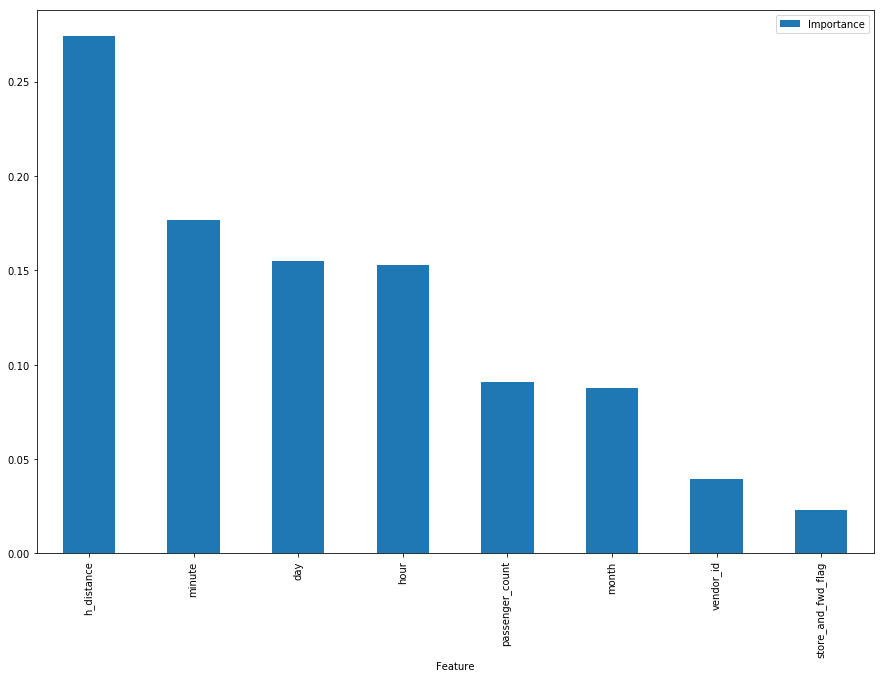

In [50]:
feature_importance = pd.Series(xgb.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [51]:
pred = xgb.predict(test[features])
print('prediction is done')

prediction is done


In [52]:
def update(x):
    if(x<0):
        return -x
    return x

In [53]:
sub = pd.DataFrame()
sub['id'] = test['id']
sub['trip_duration'] = pred
sub['trip_duration'] = sub['trip_duration'].apply(lambda x:update(x))
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.
